In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

2

In [2]:
user_data = pd.read_csv('3_user_data.csv')
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [3]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [4]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [5]:
user_data.nunique()

client     2954
premium       2
age          50
dtype: int64

In [6]:
logs = pd.read_csv('3_logs.csv')
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [7]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [8]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [9]:
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

3

In [17]:
l1 = logs.query('success == True').groupby('client',as_index=False).count().sort_values('success',ascending=False)

In [20]:
l1.head(10)

,client,success,platform,time
332,12179,41,41,41
1758,61468,41,41,41
1487,52870,41,41,41
1759,61473,41,41,41
2626,92584,41,41,41
2345,82563,41,41,41
2231,78349,41,41,41
1020,36165,41,41,41
810,28719,41,41,41
1826,64064,40,40,40


In [21]:
l2 = logs.query('success == True').groupby('client',as_index=False).count().sort_values('success',ascending=False).max()

In [22]:
l2

client      99993
success        41
platform       41
time           41
dtype: int64

In [23]:
l1.query('success == 41').sort_values('client')

,client,success,platform,time
332,12179,41,41,41
810,28719,41,41,41
1020,36165,41,41,41
1487,52870,41,41,41
1758,61468,41,41,41
1759,61473,41,41,41
2231,78349,41,41,41
2345,82563,41,41,41
2626,92584,41,41,41


4

In [30]:
logs.query('success == True').groupby('platform').count().sort_values('success',ascending=False)

,client,success,time
platform,,,
phone,2019,2019,2019
computer,1090,1090,1090
tablet,180,180,180


5

In [33]:
new_data = user_data.merge(logs,how='inner',on='client')
new_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [38]:
new_data.query('premium == True').groupby('platform').count().sort_values('success',ascending=False)

,client,premium,age,success,time
platform,,,,,
phone,246,246,246,246,246
computer,150,150,150,150,150
tablet,24,24,24,24,24


6

In [51]:
new_data_premium_true = new_data.query('premium == True')
new_data_premium_false = new_data.query('premium == False')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


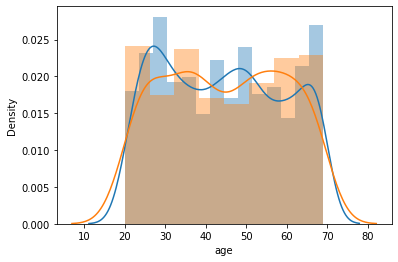

In [55]:
sns.distplot(new_data_premium_false.age)
sns.distplot(new_data_premium_true.age)

7

In [64]:
ld = new_data.groupby('client',as_index=False).agg({'success':'count'}).sort_values('success',ascending=False)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


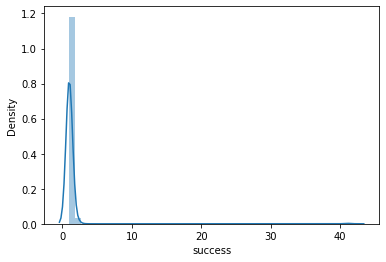

In [66]:
sns.distplot(ld.success)

8

In [67]:
comp = new_data.query('platform == "computer"')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


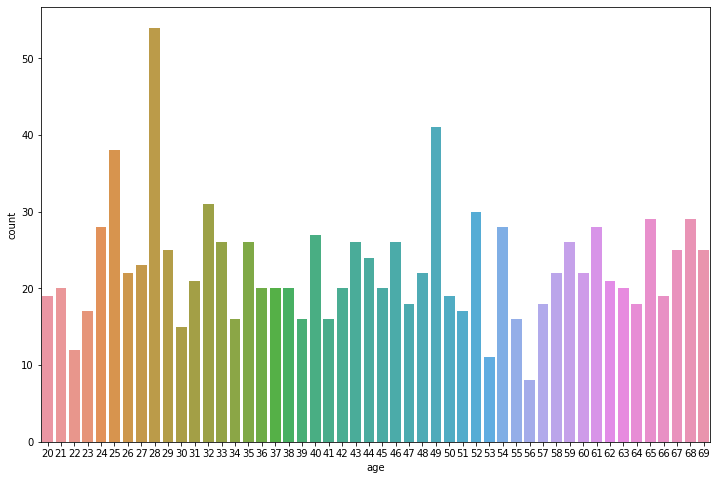

In [74]:
plt.figure(figsize=(12, 8))
sns.countplot(comp.age)